In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
fem = pd.read_csv('datasets/femur_data.csv')
fem.head()

,length,height
0,35.0,145.751662
1,36.5,154.819895
2,38.0,147.451499
3,39.5,154.532704
4,41.0,166.174503


In [3]:
legs = fem['length'].values.reshape((-1,1))
heights = fem['height'].values.reshape((-1,1))

In [4]:
# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs),1)
heights = heights.reshape(len(heights),1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = 50.7
fossil_height = model.predict(np.array([[fossil_leg]]))
print("Predicted fossil height = {:0.2f} cm".format(fossil_height[0,0]))

Predicted fossil height = 181.34 cm


In [5]:
oce = pd.read_csv('datasets/sea_level_data.csv', skiprows=6)
oce.head()

,year,sea_level_inches
0,1970,4.677165
1,1971,4.881890
2,1972,5.240157
3,1973,5.003937
4,1974,5.472441


In [6]:
years = oce['year'].values.reshape((-1,1))
levels = oce['sea_level_inches'].values.reshape((-1,1))

Prediction: year = 2100, level = 16.66


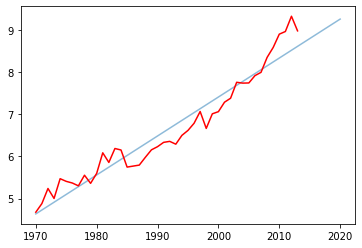

In [7]:
# Import LinearRegression class, build a model, fit to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = 2100
future_level = model.predict(np.array([[future_year]]))
print("Prediction: year = {}, level = {:.02f}".format(future_year, future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2020, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)

plt.plot(years_forecast, levels_forecast, alpha=0.5)
plt.plot(years, levels, color='red')
plt.show()

Chapter 4

In [9]:
wea = pd.read_csv('datasets/hiking_data.csv')
wea.head()

,time,distance
0,0.00,0.132007
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.468150


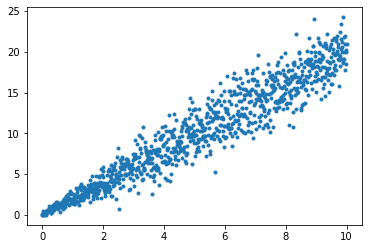

In [14]:
plt.plot(wea['time'], wea['distance'], linestyle='none', marker='.')

Bootstrap Distribution: center=10.0, spread=0.3


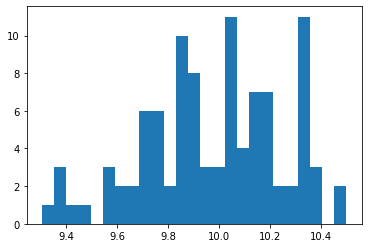

In [19]:
# Use the sample_data as a model for the population
population_model = wea['distance'].values

num_resamples = 100
resample_size = 500
bootstrap_means = np.empty(num_resamples)

# Resample the population_model 100 times, computing the mean each sample
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
fig = plt.hist(bootstrap_means, bins=25)

In [30]:
distances = wea['distance'].values
times = wea['time'].values

num_resamples=300

In [31]:
# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, num_resamples, dtype=int)

resample_speeds=np.empty_like(population_inds)

for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a1,a0 = np.polyfit(sample_times, sample_distances,1)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))

Speed Estimate = 1.21, 90% Confidence Interval: 1.00, 2.00 


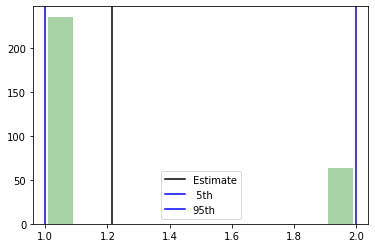

In [34]:
# Create the bootstrap distribution of speeds
#resample_speeds = compute_resample_speeds(distances, times)
#speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
fig, axis = plt.subplots()
#hist_bin_edges = np.linspace(0.0, 4.0, 21)
axis.hist(resample_speeds, bins = 10, color='green', alpha=0.35, rwidth=0.8)
axis.axvline(speed_estimate, label='Estimate', color='black')
axis.axvline(percentiles[0], label=' 5th', color='blue')
axis.axvline(percentiles[1], label='95th', color='blue')
axis.legend()
plt.show()